copy from https://github.com/openai/openai-cookbook/blob/main/examples/dalle/Image_generations_edits_and_variations_with_DALL-E.ipynb

In [1]:
!pip install --upgrade openai

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [7]:
from openai import OpenAI
import os

from IPython.display import Image, display
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


import requests
from PIL import Image


In [3]:
client = OpenAI(api_key="")

## 이미지 저장될 디렉토리 생성

In [5]:
image_dir_name = "generated_images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f"{image_dir=}")


image_dir='./generated_images'


## OpenAI API 호출

In [6]:
prompt = "A cyberpunk monkey hacker dreaming of a beautiful bunch of bananas, digital art"

generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

print(generation_response)

ImagesResponse(created=1719600037, data=[Image(b64_json=None, revised_prompt="A cyberpunk inspired scene featuring a monkey of unspecified descent clad in neon futuristic attire, engrossed in a complex hacking task. The monkey has uniquely styled hair and bold, glowing eyes, a reference to its techno-infused environment. This techno-primate dreams of a splendid collection of bananas, portrayed in lively and vivid hues. The bananas serve as a symbol of the monkey's innate desires, juxtaposing its digital, dystopian environment. The scene is conveyed through a digital medium, showcasing intricate details and layers of neon depth to evoke a futuristic aura.", url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-5jMViTOaysi03U7hhZbqDF3t/user-PlXqheh2BWNhBlq4pfnMcGzF/img-FpG2HJ3SuWqul1F4wUK5de79.png?st=2024-06-28T17%3A40%3A37Z&se=2024-06-28T19%3A40%3A37Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-

생성된 이미지는 어느 서버에 저장되었다.

다운로드 받아서 파일로 저장하자.

In [12]:
generated_image_name = "cyberpunk_monkey.png"
generated_image_filepath = os.path.join(image_dir, generated_image_name)
generated_image_url = generation_response.data[0].url
generated_image = requests.get(generated_image_url).content

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)

./generated_images/cyberpunk_monkey.png


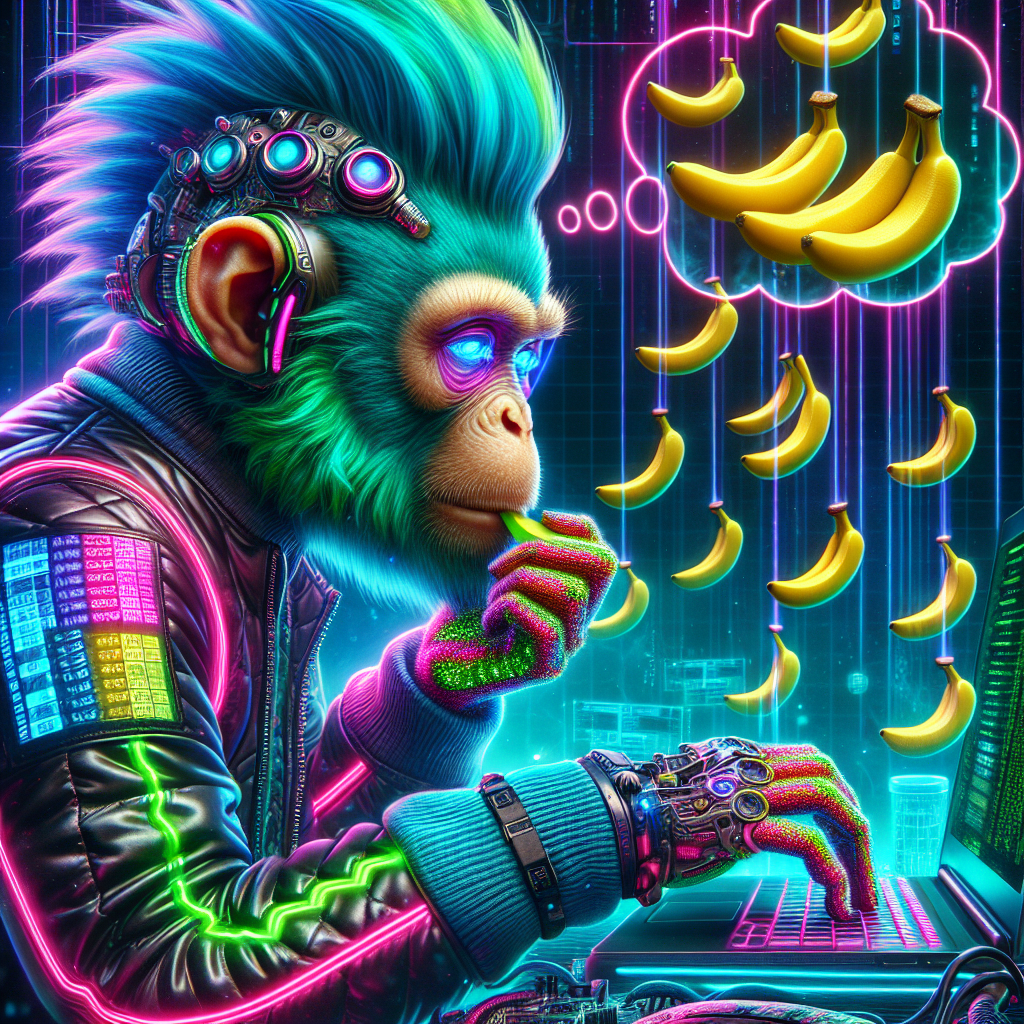

In [13]:
print(generated_image_filepath)
display(Image.open(generated_image_filepath))
